In [1]:
import os
import sys
import time
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from preprocessing_datasets import load_dataset

In [3]:
dataset_name, table, pairs = load_dataset({'dataset':'restaurant', 'cluster_method': 'hierarchy', 'verbose': 1, 'embedding_type': 'infersent'})

#####################################################################
CURRENT dataset:        restaurant
CURRENT cluster_method: hierarchy
CURRENT embedding_type: infersent
#####################################################################


In [4]:
from embedding_algorithms.inferSent import set_RNN_embedding, tuple_inferSent_embedding, RNN_embedding
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction

In [5]:
start = time.time()
set_RNN_embedding("bilstm", False, 2, 2048, 1)
print("TIME: {0}".format(time.time() - start))

Vocab size : 2196017
TIME: 157.74226713180542


In [6]:
embeddings = RNN_embedding(table, "bilstm", False)
embeddings = np.array(embeddings)

In [7]:
tsne_embeddings = tsne_dim_reduction(
    embeddings, 
    num_components=2,
    verbose=1,
    perplexity=40,
    method="barnes_hut")

starting dimension: 4096
setting TSNE with n_components: 2 & perplexity: 40


In [8]:
from cluster_algorithms.hierarchy_cluster_blocking import *

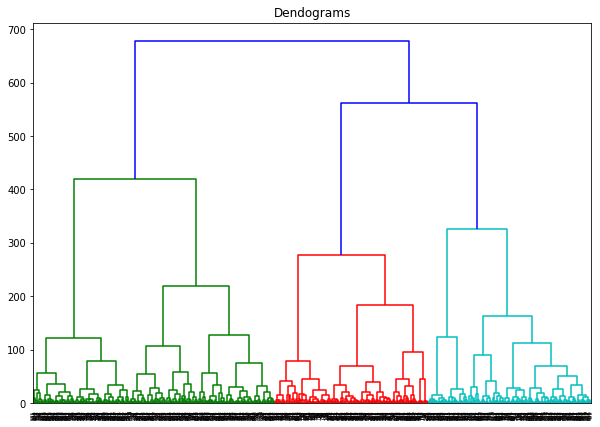

In [9]:
dendrogramPlot(tsne_embeddings)